In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

print("Impporting library is successful")

Impporting library is successful


In [ ]:
from google.colab import drive

drive.mount('/content/GDrive/')

print("Drive mounted  successfully")

Drive already mounted at /content/GDrive/; to attempt to forcibly remount, call drive.mount("/content/GDrive/", force_remount=True).
Drive mounted  successfully


In [ ]:
PATH = 'GDrive/My\ Drive/Data/cell_images/'

parasitized = os.listdir ("GDrive/My Drive/Data/cell_images/Parasitized/")
num_of_parasitized_cell= len(parasitized)


uninfected = os.listdir ("GDrive/My Drive/Data/cell_images/Uninfected/")
num_of_uninfected_cell = len(uninfected)

print ("Total images for infected cells ", num_of_parasitized_cell)
print ("Total images for uninfected cells ", num_of_uninfected_cell)


Total images for infected cells  13779
Total images for uninfected cells  13779


In [ ]:
images = []
image_labels = []

for p in parasitized:
    print(p)
    try:
    
        reading_image = cv2.imread('GDrive/My Drive/Data/cell_images/Parasitized/'+p)
        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        images.append(np.array(image_resize))
        rotate_image_40_degree = image_resize.rotate(40)
        images.append(np.array(rotate_image_40_degree))
        image_labels.append(1)
        image_labels.append(1)

    except AttributeError:
        print('')

for u in uninfected:
    print(u)

    try:
        
        reading_image = cv2.imread('GDrive/My Drive/Data/cell_images/Uninfected/'+u)

        image_array = Image.fromarray(reading_image , 'RGB')

        image_resize = image_array.resize((64 , 64))
        images.append(np.array(image_resize))
        rotate_image_40_degree = image_resize.rotate(40)
        images.append(np.array(rotate_image_40_degree))
        image_labels.append(0)
        image_labels.append(0)

        
    except AttributeError:
        print('')

Streaming output truncated to the last 5000 lines.
C175P136NThinF_IMG_20151127_141325_cell_168.png
C161P122ThinF_IMG_20151116_101059_cell_57.png
C163P124ThinF_IMG_20151116_111147_cell_125.png
C172P133ThinF_IMG_20151119_154936_cell_186.png
C161P122ThinF_IMG_20151116_101126_cell_67.png
C162P123ThinF_IMG_20151116_104451_cell_52.png
C162P123ThinF_IMG_20151116_104451_cell_163.png
C176P137NThinF_IMG_20151201_121808_cell_68.png
C177P138NThinF_IMG_20151201_142942_cell_24.png
C166P127ThinF_IMG_20151117_194147_cell_64.png
C168P129ThinF_IMG_20151118_154651_cell_63.png
C178P139NThinF_IMG_20151201_154025_cell_63.png
C154P115ThinF_IMG_20151115_141336_cell_45.png
C180P141NThinF_IMG_20151201_163751_cell_5.png
C166P127ThinF_IMG_20151117_194932_cell_203.png
C157P118ThinF_IMG_20151115_164141_cell_126.png
C175P136NThinF_IMG_20151127_141253_cell_8.png
C157P118ThinF_IMG_20151115_163915_cell_105.png
C176P137NThinF_IMG_20151201_120845_cell_48.png
C161P122ThinF_IMG_20151116_101210_cell_119.png
C175P136NThinF_I

In [ ]:
image_cells = np.array(images)
image_labels = np.array(image_labels)

np.save('Image cells' , image_cells)
np.save('Image labels' , image_labels)

In [ ]:
print('Image cells : {} | Image labels: {}'.format(image_cells.shape , image_labels.shape))

Image cells : (55116, 64, 64, 3) | Image labels: (55116,)


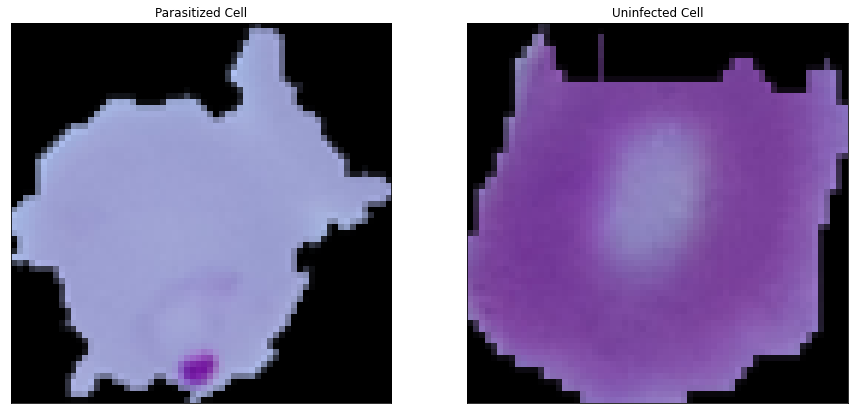

In [ ]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(image_cells[0])
plt.title('Parasitized Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(image_cells[30000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
n = np.arange(image_cells.shape[0])
np.random.shuffle(n)
image_cells = image_cells[n]
image_labels = image_labels[n]

In [ ]:
image_cells = image_cells.astype(np.float32)
image_labels = image_labels.astype(np.int32)
image_cells = image_cells/255

In [ ]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(image_cells , image_labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

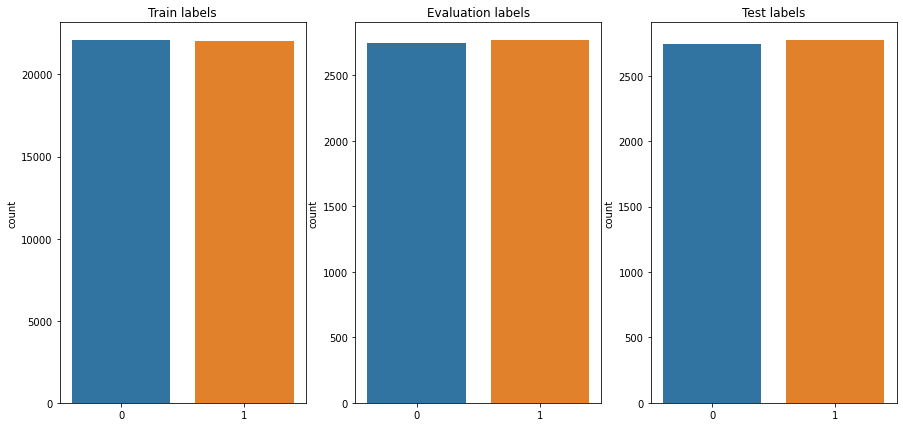

In [ ]:
plt.figure(1 , figsize = (15 ,7))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['Train labels','Evaluation labels','Test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [ ]:
print('Train data shape {} ,Evaluation data shape {} , Test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

Train data shape (44092, 64, 64, 3) ,Evaluation data shape (5512, 64, 64, 3) , Test data shape (5512, 64, 64, 3)


In [ ]:
from tensorflow.python.framework import ops

In [ ]:
ops.reset_default_graph()

def cnn_model_function(features , labels , mode):

    input_layers = tf.reshape(features['x'] , [-1 , 64 , 64 ,3])    

    convolution_1 = tf.layers.conv2d(
        inputs = input_layers , 
        filters = 40 , 
        kernel_size = [5 , 5],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    convolution_2 = tf.layers.conv2d(
        inputs = convolution_1, 
        filters = 70,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )


    convolution_3 = tf.layers.conv2d(
        inputs = convolution_2, 
        filters = 15,
        kernel_size = [3 , 3],
        padding = 'same',
        activation = tf.nn.relu
        )
    
    max_pool_1 = tf.layers.max_pooling2d(inputs = convolution_2 , pool_size = [2 , 2] , strides = 2 )
    
    pool_2_flatten = tf.layers.flatten(max_pool_1)

    density_1 = tf.layers.dense(
        inputs = pool_2_flatten,
        units = 1024,
        activation = tf.nn.relu
        )
    
    density_2 = tf.layers.dense(
        inputs = density_1,
        units = 512,
        activation = tf.nn.relu
        )
    
    dropout = tf.layers.dropout(
        inputs = density_2, 
        rate = 0.3, 
        training = (mode == "train")
        )

    
    logits = tf.layers.dense(
        inputs = dropout ,
        units = 10
        )
    
    predictions = {
        'predict_classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , logits = logits)
  
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
        train_optimizer = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_optimizer 
                                           )
    evaluation_metric_optimizer = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['predict_classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = evaluation_metric_optimizer)    

In [ ]:
malaria_cell_detector = tf.estimator.Estimator(model_fn = cnn_model_function , model_dir = '/tmp/modelchkpt')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/modelchkpt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
tensors_to_log ={'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
                tensors = tensors_to_log , 
                every_n_iter = 10 )

In [ ]:
train_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 99 , 
    num_epochs = None, 
    shuffle = True
    )

In [ ]:
malaria_cell_detector.train(input_fn = train_input_function ,
                            steps = 2000 ,
                            hooks = [logging_hook])

Streaming output truncated to the last 5000 lines.
 [0.7184825  0.28103843 0.00006325 0.00006632 0.00012748 0.00002117
  0.00005466 0.0000946  0.00002361 0.00002793]
 [0.14527965 0.85462695 0.00000673 0.00000436 0.00000884 0.00000595
  0.00002834 0.00000228 0.00000479 0.00003211]
 [0.9693006  0.03069692 0.00000029 0.00000027 0.00000057 0.00000004
  0.00000063 0.00000016 0.0000004  0.00000005]
 [0.80260926 0.19738594 0.0000007  0.00000066 0.00000136 0.00000014
  0.00000037 0.00000072 0.00000058 0.00000025]
 [0.9959279  0.00390744 0.00001229 0.00002586 0.00005682 0.00000594
  0.00001328 0.00003545 0.00000717 0.0000079 ]
 [0.02240653 0.9775704  0.00000077 0.00000315 0.00000316 0.0000024
  0.00000713 0.0000007  0.00000063 0.00000503]
 [0.9137272  0.08603081 0.00002125 0.00003854 0.00002283 0.00001544
  0.00003004 0.00001689 0.00007432 0.00002261]
 [0.04263693 0.95735544 0.00000051 0.00000307 0.00000217 0.00000007
  0.00000034 0.0000009  0.00000032 0.00000033]
 [0.992374   0.00762041 0.0000

In [ ]:
#https://www.google.com/search?q=training+loss+vs+validation+loss&client=firefox-b-d&sxsrf=ALeKk03hZ_j3b8jgIWMJaaR7mMZs6B2NeA:1607012141284&tbm=isch&source=iu&ictx=1&fir=aMrdrNJ8qjfMLM%252C7-4-n1CXtlM2tM%252C_&vet=1&usg=AI4_-kSrtR3lYQAZhGgmmEH_VAKAZoaL1A&sa=X&ved=2ahUKEwjfjtLemrLtAhUSjuYKHRqzBMYQ_h16BAgLEAE#imgrc=aMrdrNJ8qjfMLM
#https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

In [ ]:
eval_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = malaria_cell_detector.evaluate(input_fn = eval_input_function)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-05T04:34:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 8.92206s
INFO:tensorflow:Finished evaluation at 2020-12-05-04:34:55
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.9339623, global_step = 2000, loss = 0.18233718
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/modelchkpt/model.ckpt-2000
{'accuracy': 0.9339623, 'loss': 0.18233718, 'global_step': 2000}


In [ ]:
prediction_input_function = tf.estimator.inputs.numpy_input_fn(
    x = {'x' : test_x},
    y = test_y,
    num_epochs = 1,
    shuffle = False
    )

y_pred = malaria_cell_detector.predict(input_fn = prediction_input_function)
predict_classes = [p['predict_classes'] for p in y_pred]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/modelchkpt/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(test_y , predict_classes) , 
                           classification_report(test_y , predict_classes) , 
                           accuracy_score(test_y , predict_classes)))

[[2653   89]
 [ 289 2481]] 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2742
           1       0.97      0.90      0.93      2770

    accuracy                           0.93      5512
   macro avg       0.93      0.93      0.93      5512
weighted avg       0.93      0.93      0.93      5512
 
0.931422351233672


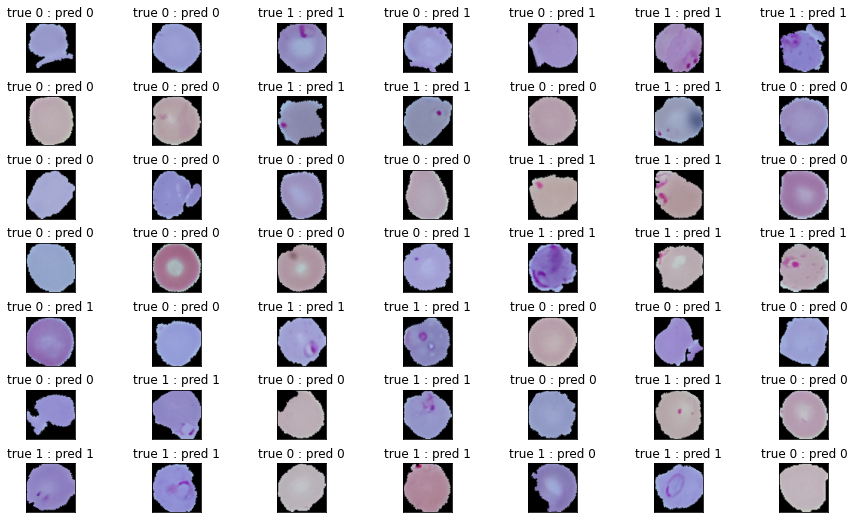

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , predict_classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()